In [1]:
import scipy.stats
import pandas
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import re
%matplotlib inline


In [2]:
plt.style.use("bmh")

headers = ['tstamp','longitude','latitude','deep','magnitude']

conn = psycopg2.connect(dbname="lapalma", user="qwatcher", password="11111111", host="192.168.0.1")
cur = conn.cursor()

cur.execute(f"SELECT tstamp,ST_X(ST_AsText(coors)) as longitude ,ST_Y(ST_AsText(coors)) as latitude,ST_Z(ST_AsText(coors)) as deep,ST_M(ST_AsText(coors)) as magnitude from quakes where tstamp>'2020-01-01'")
rows = cur.fetchall()
cur.close()
conn.close()



In [3]:
data = pandas.DataFrame(rows, columns=headers)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tstamp     6560 non-null   datetime64[ns, UTC]
 1   longitude  6560 non-null   float64            
 2   latitude   6560 non-null   float64            
 3   deep       6560 non-null   float64            
 4   magnitude  6560 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(4)
memory usage: 256.4 KB


In [4]:
print(data)

                        tstamp  longitude  latitude  deep  magnitude
0    2020-01-13 19:48:51+00:00   -17.8768   28.8290   0.0        1.1
1    2020-01-26 03:46:46+00:00   -17.7397   28.6761 -25.0        1.4
2    2020-01-27 04:59:59+00:00   -17.8613   28.5913 -26.0        1.4
3    2020-02-01 02:18:30+00:00   -17.7495   28.4982  -3.0        1.3
4    2020-03-08 03:01:41+00:00   -17.6828   28.6787 -18.0        1.3
...                        ...        ...       ...   ...        ...
6555 2021-10-11 10:02:09+00:00   -17.8339   28.5641 -10.0        3.4
6556 2021-10-11 10:03:59+00:00   -17.8360   28.5643 -10.0        3.1
6557 2021-10-11 10:14:55+00:00   -17.8373   28.5613 -10.0        2.5
6558 2021-10-11 10:22:52+00:00   -17.8328   28.5619 -10.0        2.8
6559 2021-10-11 10:24:59+00:00   -17.8348   28.5682 -11.0        2.8

[6560 rows x 5 columns]


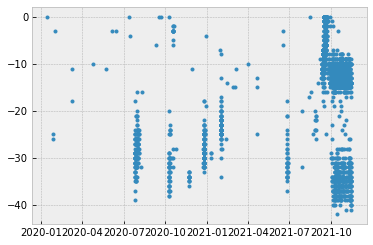

In [5]:
x=data.tstamp
y=data.deep
plt.plot(x,y, ".");

plt.show()

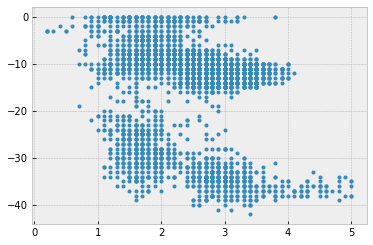

In [6]:
y=data.deep
mgn=data.magnitude
plt.plot(mgn,y, ".");
plt.show()

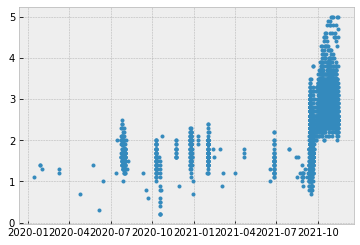

In [7]:
y=data.deep
mgn=data.magnitude
plt.plot(x,mgn, ".");
plt.show()

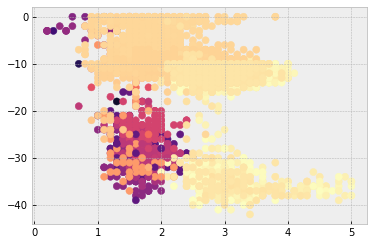

In [8]:
x=data.tstamp
y=data.deep
mgn=data.magnitude
unix=pandas.to_datetime(data.tstamp).view(int)/10**9
plt.scatter(mgn,y,s=50,marker='o',c=x, cmap='magma')
#plt.scatter(x, y, s=100, marker='o', c=mgn, cmap='magma')
plt.show()

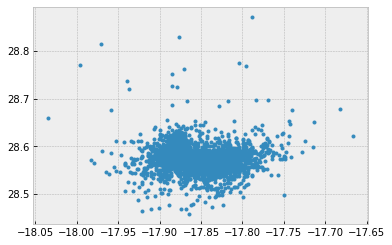

In [9]:
plt.plot(data.longitude,data.latitude, ".");

plt.show()

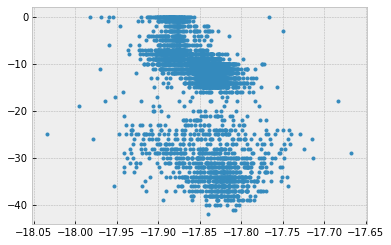

In [10]:
y=data.deep
plt.plot(data.longitude,y, ".");

plt.show()


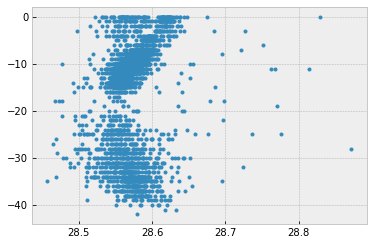

In [11]:
y=data.deep
plt.plot(data.latitude,y, ".");

plt.show()

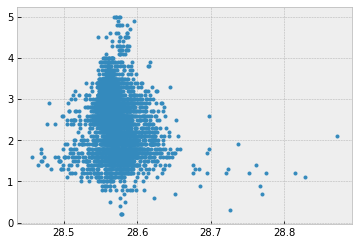

In [12]:
y=data.deep
plt.plot(data.latitude,data.magnitude, ".");

plt.show()

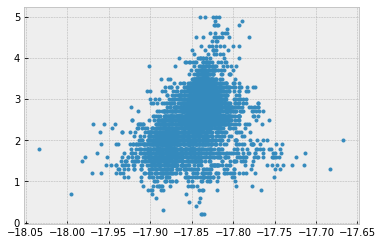

In [13]:
y=data.deep
plt.plot(data.longitude,data.magnitude, ".");

plt.show()

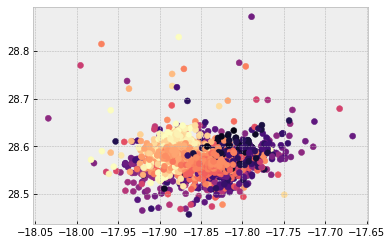

In [14]:
unix=pandas.to_datetime(data.tstamp).view(int)/10**9
y=data.deep
#plt.scatter(data.longitude,data.latitude,s=y,marker='o',c=x, cmap='magma')
plt.scatter(data.longitude,data.latitude,c=y,marker='o',cmap='magma')
plt.show()